In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

plt.rcParams["font.family"] = "Times New Roman"

In [82]:
file = "293K_SectionA.xlsx"
sheets = ["Wide_Spectra","Peak_Spectra"]
cols = [["WS_0","WS_1","WS_2","WS_3","WS_4","WS_5","WS_6","WS_7","WS_8","WS_9"], #Wide_spectra
         ["PS_0","PS_1","PS_2","PS_3","PS_4","PS_5","PS_6","PS_7","PS_8","PS_9"] #Peak_Spectra
        ]
start_index = [9830,9795]

def wavelength_extraction(x,start_index):
    A = 1.0095
    alpha_A = 0.0001

    B = 9091.0570
    alpha_B = 0.0289

    wavelengths = []
    uncertainties = []

    for i in range(len(x)):
        wavelength = (start_index-x[i]/10-B)/A
        uncertainty = np.abs((x[i]-(B+alpha_B))/(A+alpha_A) - wavelength)

        wavelengths.append(wavelength)
        uncertainties.append(uncertainty)

    print(wavelength)
    return wavelengths, uncertainties

707.323427439326


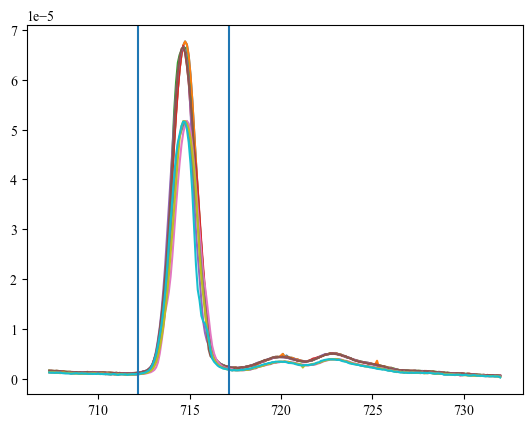

In [98]:
df_WP = pd.read_excel(file, sheets[0])

indexes_250 = np.arange(0,250,1)

wavelengths_250, uncertainties_250 = wavelength_extraction(indexes_250,9830)

for col in cols[0]:
    plt.figure(1)
    plt.plot(wavelengths_250,df_WP[col],label=col)
plt.axvline(wavelengths_250[200])
plt.axvline(wavelengths_250[150])


In [87]:
#Trial Models
def Lorentzian_Function(x, A, x0, B, C):
    return A / (1 + ((x - x0)/B)**2) + C

def Double_Lorentzian_Function(x, A_1, x0_1, B_1, A_2, x0_2, B_2,C):
    return A_1 / (1 + ((x - x0_1)/B_1)**2) + A_2 / (1 + ((x - x0_2)/B_2)**2) + C

def Gaussian_Function(x,A,B,C):
    return A*np.exp(B*x**2)+C

def Double_Gaussian_Function(x, A_1, B_1, A_2, B_2, C):
    return A_1*np.exp(B_1*x**2)+A_2*np.exp(B_2*x**2)+C

#Other Functions
def Chi2_Function(model, model_params, x_data, y_data, y_error):
    return np.sum(((y_data - model(x_data, *model_params)) / y_error)**2)

def Rchi2_Function(model, model_params, x_data, y_data, y_error, DoF):
    return np.sum(((y_data - model(x_data, *model_params)) / y_error)**2)/DoF

In [72]:
#Workflow:

intensity_0 = df_WP['WS_0']
p0 = [intensity_0.max(),             # A
      690,                  # x0
      len(fit_indices) / 4,         # B
       y_fitdata.min()               # C
        ]

popt_int_0 , cov_int_0 = curve_fit(Lorentzian_Function,
                                   xdata= wavelengths_250,
                                   ydata= intensity_0,
                                   sigma= intensity_0/100,
                                   absolute_sigma=True,
                                   p0 = p0_lorentzian)